# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [132]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

response = requests.get(query_url + cities[3]).json()
response

{'coord': {'lon': 141.97, 'lat': -38.27},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 288.2,
  'feels_like': 284.42,
  'temp_min': 288.2,
  'temp_max': 288.2,
  'pressure': 1003,
  'humidity': 80,
  'sea_level': 1003,
  'grnd_level': 1002},
 'wind': {'speed': 6.12, 'deg': 357},
 'clouds': {'all': 100},
 'dt': 1585851007,
 'sys': {'country': 'AU', 'sunrise': 1585860472, 'sunset': 1585902155},
 'timezone': 39600,
 'id': 2171099,
 'name': 'Codrington',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [133]:
n=1
x=1
weather_data=[]
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] =='404':
        print("City not found. Skipping...")
        n=n+1
    else:
        print(f"Processing Record {n} of Set {x} | {city}")
        n=n+1
        weather_data.append(response)
    if n%60==0:
        time.sleep(60)
        x=x+1

Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | burnie
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | pokaran
Processing Record 17 of Set 1 | kurkino
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | morecambe
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | pringsewu
Processing Record 24 of Set 1 | castro
Processing Record 25 of Set 1 | mehamn
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data[1]['name'],weather_data[1]['clouds']['all'],weather_data[1]['sys']['country'],weather_data[1]['dt'],weather_data[1]['main']['humidity']\
,weather_data[1]['coord']['lat'],weather_data[1]['coord']['lon'],weather_data[1]['main']['temp_max'],weather_data[1]['wind']['speed']

('Jamestown', 90, 'US', 1585841524, 48, 42.1, -79.24, 7, 6.7)

In [15]:
clean_weather_data1=[]
for city in weather_data:
    clean_weather_data1.append((city['name'],city['clouds']['all'],city['sys']['country'],city['dt'],city['main']['humidity'],city['coord']['lat'],city['coord']['lon'],city['main']['temp_max'],city['wind']['speed']))

In [175]:
import csv 
with open('data.csv','w') as out:
    writer=csv.writer(out)
    writer.writerow(['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp', 'Wind Speed'])
    for row in clean_weather_data1:
        writer.writerow(row)
        
df=pd.read_csv("data.csv")
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cayenne,88,GF,1585841405,94,4.93,-52.33,26.00,6.20
1,Jamestown,90,US,1585841524,48,42.10,-79.24,7.00,6.70
2,Vila Velha,40,BR,1585841524,66,-20.33,-40.29,30.56,3.60
3,Codrington,100,AU,1585841524,84,-38.27,141.97,14.39,4.11
4,Lebu,0,CL,1585841524,48,-37.62,-73.65,17.44,7.80
...,...,...,...,...,...,...,...,...,...
553,Pisco,36,PE,1585842206,30,-13.70,-76.22,25.56,2.60
554,Izhevskoye,100,RU,1585842206,71,54.56,40.87,3.87,4.49
555,Yaan,49,NG,1585842206,39,7.38,8.57,35.79,3.15
556,Magdagachi,100,RU,1585842206,90,53.45,125.80,-9.34,2.38


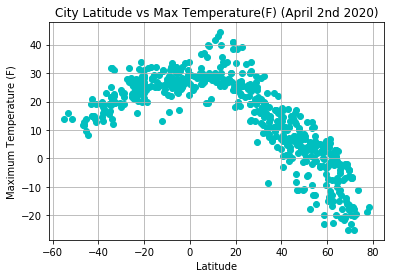

In [186]:
plt.scatter(df['Lat'], df['Max Temp'],c='c',marker='o')
plt.grid()
plt.title("City Latitude vs Max Temperature(F) (April 2nd 2020)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig('City Latitude Vs Max Temp.png',dpi=500)
plt.show()


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

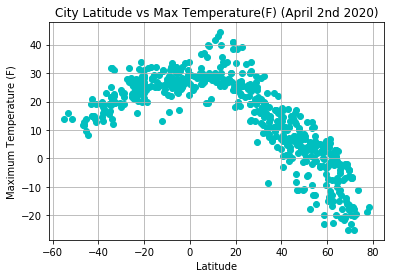

In [187]:
plt.scatter(df['Lat'], df['Max Temp'],c='c',marker='o')
plt.grid()
plt.title("City Latitude vs Max Temperature(F) (April 2nd 2020)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig('City Latitude Vs Max Temp.png',dpi=500)
plt.show()

#### This plot shows the cities around the equator have the higher maximum temperature. Additionally, the cities move away from the equator the temperature falls. As this is winter in northern hemisphere, the maximum temperatures are low.  

#### Latitude vs. Humidity Plot

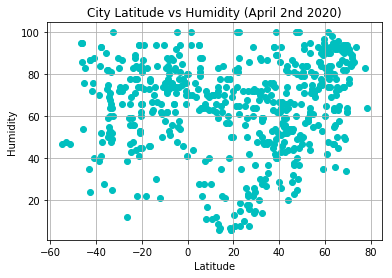

In [188]:
plt.scatter(df['Lat'], df['Humidity'],c='c',marker='o')
plt.grid()
plt.title("City Latitude vs Humidity (April 2nd 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('City Latitude vs Humidity.png',dpi=500)
plt.show()

#### This plot shows that there is not much coorelation between latitude and humidity

#### Latitude vs. Cloudiness Plot

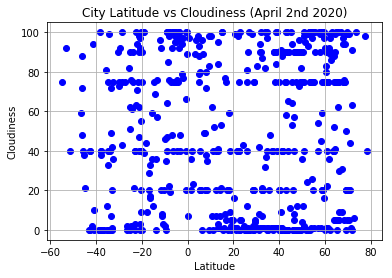

In [189]:
plt.scatter(df['Lat'], df['Cloudiness'],c='b',marker='o')
plt.grid()
plt.title("City Latitude vs Cloudiness (April 2nd 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('City Latitude vs Cloudiness.png',dpi=500)
plt.show()

#### This plot shows that there is not much coorelation between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

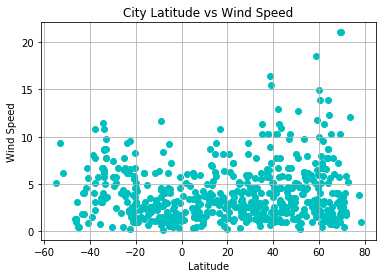

In [157]:
plt.scatter(df['Lat'], df['Wind Speed'],c='c',marker='o')
plt.grid()
plt.title("City Latitude vs Wind Speed (April 2nd 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('City Latitude vs Wind Speed.png',dpi=500)
plt.show()

#### This plot shows that there is no coorelation between latitude and Wind Speed

## Linear Regression

In [176]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_regress(df, var1,var2):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[var1],df[var2] )
    regress_values=df[var1]* slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(df[var1], df[var2])
    plt.plot(df[var1],regress_values,"r-")
    plt.annotate(line_eq,(10,10),fontsize=15,color="red",xytext=(70,40),horizontalalignment='right',verticalalignment='bottom')
    plt.xlabel( var1)
    plt.ylabel(var2)
    plt.savefig(f'{var1} vs {var2}.png',dpi=500)
    plt.show()
    print(f"The r-squared is: {rvalue}")
    


In [177]:
# Create Northern and Southern Hemisphere DataFrames
df_NH=df.loc[(df['Lat']>=0)]
df_SH=df.loc[(df['Lat']<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

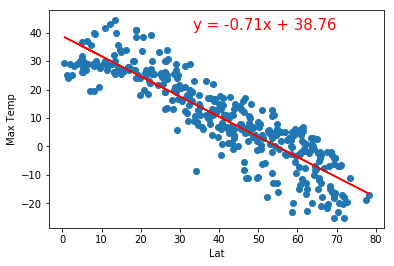

The r-squared is: -0.8933069689660653


In [179]:
Linear_regress(df_NH,'Lat','Max Temp')

#### This plot shows that there is a clear coorelation between latitude and max temperture in the northern hemisphere. As the latitude increases the max temperature decreases (this is also because of winter season in the northern hemisphere)
### High R-squared value also means that the data fits the model 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

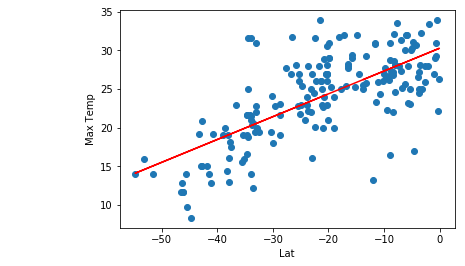

The r-squared is: 0.7008535556386462


In [180]:
Linear_regress(df_SH,'Lat','Max Temp')

#### This plot shows that there is a clear coorelation between latitude and max temperture in the southern hemisphere. As the latitude decreases the max temperature decreases (the temperatures are higher than the nothern hemisphere data as it is summer in the southern hemisphere)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

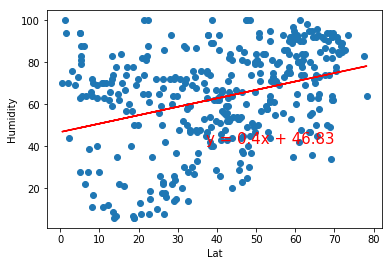

The r-squared is: 0.33940362514263933


In [181]:
Linear_regress(df_NH,'Lat','Humidity')

#### The coorelation coffecient is low which can be seen my by the graph

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

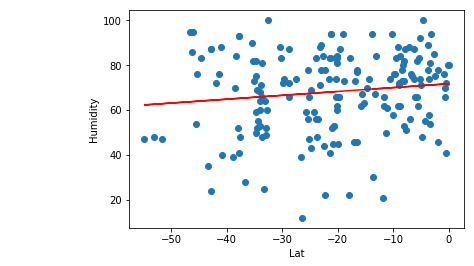

The r-squared is: 0.1289999941739532


In [182]:
Linear_regress(df_SH,'Lat','Humidity')

#### There is no coorelation between the latitude and humidity as seen by the graph and the r-squared value

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

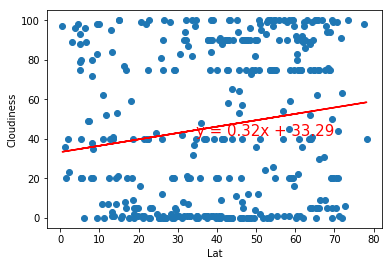

The r-squared is: 0.16366969771037493


In [183]:
Linear_regress(df_NH,'Lat','Cloudiness')

#### There is no coorelation between the latitude and cloudiness as seen by the graph and the r-squared value

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

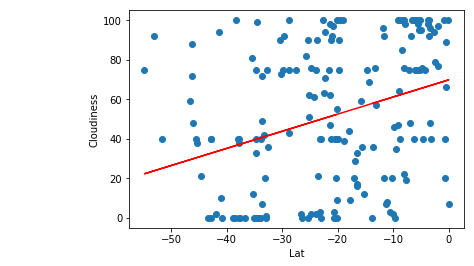

The r-squared is: 0.3253983399503016


In [184]:
Linear_regress(df_SH,'Lat','Cloudiness')

#### There is no coorelation between the latitude and cloudiness in the southern hemisphere as seen by the graph and the r-squared value

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

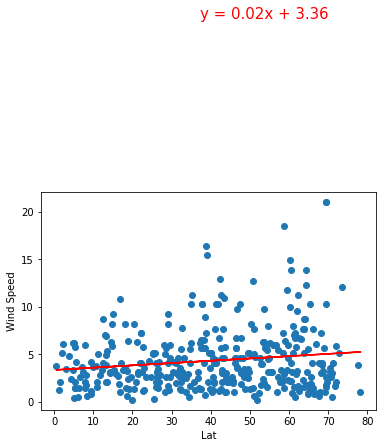

The r-squared is: 0.1466679432316906


In [185]:
Linear_regress(df_NH,'Lat','Wind Speed')

#### There is no coorelation between the latitude and wind speed as seen by r-squared value

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

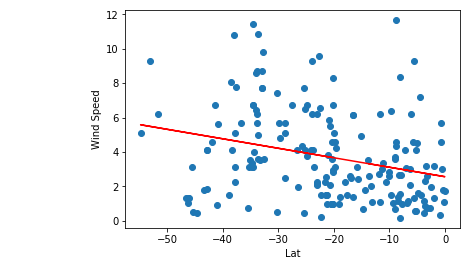

The r-squared is: -0.28282383703164443


In [166]:
Linear_regress(df_SH,'Lat','Wind Speed')

#### There is no coorelation between the latitude and wind speed as seen by r-squared value